<a href="https://colab.research.google.com/github/neerajthandayan/Deep_Learning/blob/main/Recurrent%20Neural%20Networks/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recurrent Neural Networks

## Part- 1 Data Pre-Processing

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing Training Set
train = pd.read_csv("https://raw.githubusercontent.com/neerajthandayan/Deep_Learning/main/Recurrent%20Neural%20Networks/Google_Stock_Price_Train.csv")
train_set = train.iloc[:,1:2].values

In [4]:
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = [] 
Y_train = []

for i in range(60, 1258):
    X_train.append(train_scaled[i-60:i, 0])
    Y_train.append(train_scaled[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
# Reshaping Data
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) 

## Part - 2 Building the RNN with LSTM

In [7]:
# Importing Kears Libraries and Packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [8]:
# Initialising RNN
regressor = Sequential()

# Adding first LSTM Layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, 
                   return_sequences=True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding Second LSTM Layer and some Dropout Regularisation
regressor.add(LSTM(units = 50,
                   return_sequences=True))
regressor.add(Dropout(0.2))

# Adding Third LSTM Layer and some Dropout Regularisation
regressor.add(LSTM(units = 50,
                   return_sequences=True))
regressor.add(Dropout(0.2))

# Adding Forth LSTM Layer and some Dropout Regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding Output Layer
regressor.add(Dense(units = 1))

In [9]:
# Compiling Model
regressor.compile(optimizer= 'adam',
                  loss= 'mean_squared_error')

In [10]:
# Fitting the RNN to the Training Set
regressor.fit(X_train,Y_train,
              epochs=100,
              batch_size= 32)

Epoch 1/100
38/38 [==============================] - 11s 109ms/step - loss: 0.0988
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0049
Epoch 13/100

## Making Predictions And Vislualising Results

In [11]:
# Fetching Test Set Data

test = pd.read_csv("https://raw.githubusercontent.com/neerajthandayan/Deep_Learning/main/Recurrent%20Neural%20Networks/Google_Stock_Price_Test.csv")
test_set = test.iloc[:,1:2].values

In [19]:
total = pd.concat((train['Open'],test['Open']), axis = 0)
inputs = total[len(total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)

Q_test = []
for i in range(60, 80):
    Q_test.append(inputs[i-60:i, 0])
Q_test = np.array(Q_test)

Q_test = np.reshape(Q_test, (Q_test.shape[0], Q_test.shape[1], 1))

In [20]:
# Predicting Data

pred = regressor.predict(Q_test)
pred = scaler.inverse_transform(pred)

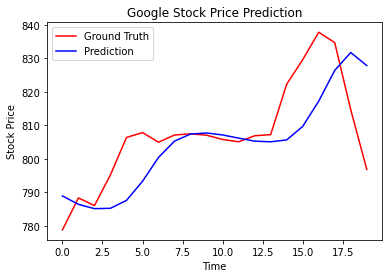

In [31]:
# Visualising Predictions

plt.pyplot.plot(test_set, color = 'red', label = 'Ground Truth')
plt.pyplot.plot(pred, color = 'blue', label = 'Prediction')
plt.pyplot.title('Google Stock Price Prediction')
plt.pyplot.xlabel('Time')
plt.pyplot.ylabel('Stock Price')
plt.pyplot.legend()